In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('viviendas.csv')
df.head(5)

,superficie,habitaciones,antiguedad,barrio,precio
0,89.9,1.0,34,Centro,106030.0
1,77.2,5.0,15,Este,78179.0
2,93.0,1.0,40,Sur,84482.0
3,110.5,3.0,35,Este,120883.0
4,75.3,2.0,32,Norte,78510.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   superficie    95 non-null     float64
 1   habitaciones  95 non-null     float64
 2   antiguedad    100 non-null    int64  
 3   barrio        100 non-null    object 
 4   precio        100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [12]:
df.describe()

,superficie,habitaciones,antiguedad,precio
count,95.000000,95.000000,100.000000,100.000000
mean,77.868421,2.747368,27.730000,83928.070000
std,18.325336,1.328640,13.511578,20145.484481
min,27.600000,1.000000,1.000000,34527.000000
25%,68.000000,1.500000,19.750000,71592.250000
50%,76.300000,3.000000,29.000000,84796.000000
75%,88.700000,4.000000,38.250000,100310.750000
max,117.000000,5.000000,49.000000,129254.000000


In [13]:
# Detect missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values with the mean
# df['superficie'].fillna(df['superficie'].mean(), inplace=True)
df['superficie'].fillna(0, inplace=True)
# df['habitaciones'].fillna(df['habitaciones'].mean(), inplace=True)
df['habitaciones'].fillna(0, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
superficie      5
habitaciones    5
antiguedad      0
barrio          0
precio          0
dtype: int64

Missing values after imputation:
superficie      0
habitaciones    0
antiguedad      0
barrio          0
precio          0
dtype: int64


/tmp/ipython-input-4114397185.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['superficie'].fillna(0, inplace=True)
/tmp/ipython-input-4114397185.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [16]:
# Check data types
print("Data types before conversion:")
print(df.dtypes)

# Convert data types if necessary
df['barrio'] = df['barrio'].astype('string')

print("\nData types after conversion:")
print(df.dtypes)

Data types before conversion:
superficie       float64
habitaciones     float64
antiguedad         int64
barrio          category
precio           float64
dtype: object

Data types after conversion:
superficie             float64
habitaciones           float64
antiguedad               int64
barrio          string[python]
precio                 float64
dtype: object


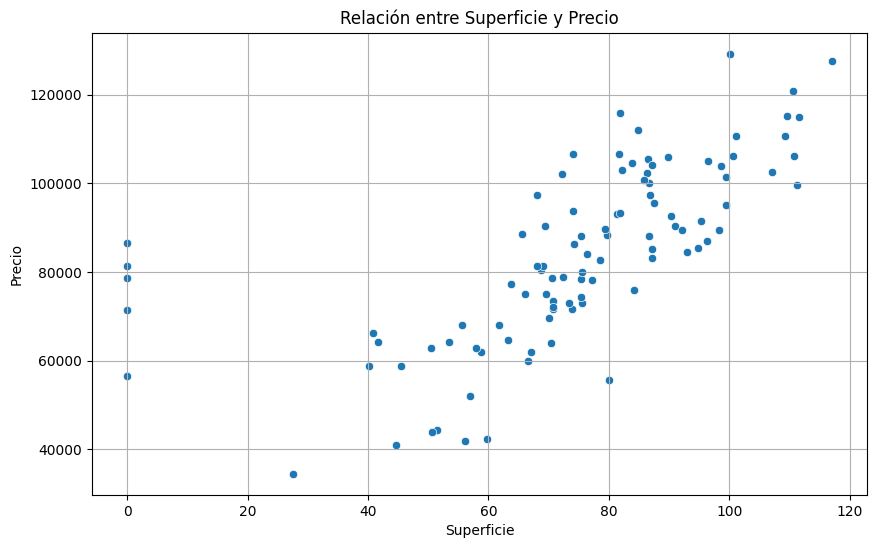

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='superficie', y='precio', data=df)
plt.title('Relación entre Superficie y Precio')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

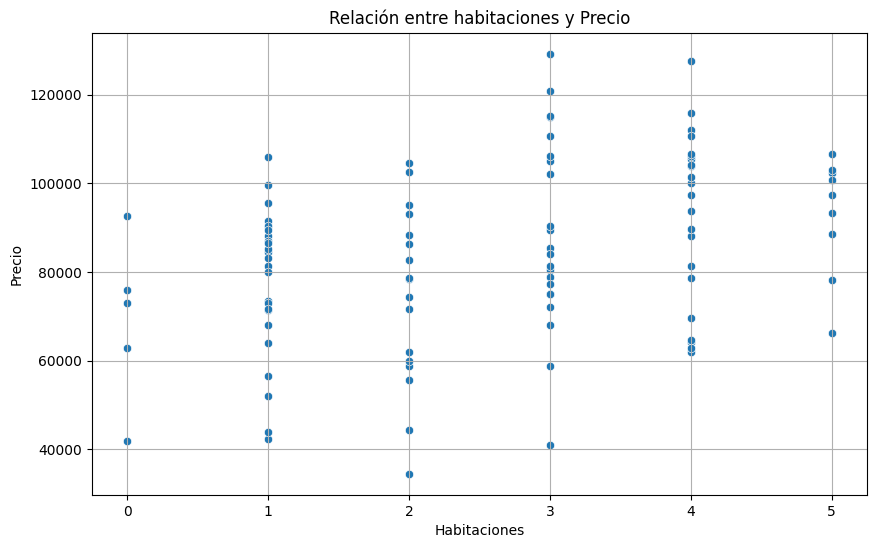

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='habitaciones', y='precio', data=df)
plt.title('Relación entre habitaciones y Precio')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

In [20]:
df = pd.get_dummies(df, columns=['barrio'], drop_first=True) #One-hot encoding
display(df.head())

,superficie,habitaciones,antiguedad,precio,barrio_Este,barrio_Norte,barrio_Oeste,barrio_Sur
0,89.9,1.0,34,106030.0,False,False,False,False
1,77.2,5.0,15,78179.0,True,False,False,False
2,93.0,1.0,40,84482.0,False,False,False,True
3,110.5,3.0,35,120883.0,True,False,False,False
4,75.3,2.0,32,78510.0,False,True,False,False


In [21]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('precio', axis=1) #Elije todas menos precio
y = df['precio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80, 7)
Testing set shape: (20, 7)


In [23]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display the coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

print("\nModel Intercept:", model.intercept_)

Model Coefficients:
superficie: 484.5145074012215
habitaciones: 3396.288941343708
antiguedad: -18.67157559234556
barrio_Este: -4784.537059732888
barrio_Norte: -6772.137339123874
barrio_Oeste: 1135.0970546089995
barrio_Sur: 650.7121240553

Model Intercept: 40750.525487599596


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# Comment on model performance
if r2 > 0.75:
    print("\nComment: The model appears to have a good performance, as the R² score is relatively high, indicating that a large proportion of the variance in the target variable ('precio') is explained by the model.")
elif r2 > 0.5:
    print("\nComment: The model's performance is moderate. The R² score suggests that a significant portion of the variance in the target variable ('precio') is explained, but there is still room for improvement.")
else:
    print("\nComment: The model's performance is relatively low. The R² score indicates that the model does not explain a large portion of the variance in the target variable ('precio'). Further feature engineering or a different model might be needed.")

Mean Squared Error (MSE): 198946910.03245044
R-squared (R²): 0.3830916533769003

Comment: The model's performance is relatively low. The R² score indicates that the model does not explain a large portion of the variance in the target variable ('precio'). Further feature engineering or a different model might be needed.
